In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import numpy as np
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

from graficaMLP import dibuPtos_y_2Rectas
from Funciones import evaluar, evaluarDerivada

### Ejemplos del XOR

In [3]:
X = np.array([ [-1, -1], [-1, 1], [1, -1], [1, 1]])
T = np.array([-1, 1, 1, -1]).reshape(-1,1)

nEjemplos = X.shape[0]
print("X es una matriz de ", X.shape, '\n', X)

print("\nT es un vector columna de ", T.shape, '\n', T)



X es una matriz de  (4, 2) 
 [[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]]

T es un vector columna de  (4, 1) 
 [[-1]
 [ 1]
 [ 1]
 [-1]]


### Arquitectura y parámetros de la red

Note que la cantidad de entradas y salidas dependen del problema mientras que la cantidad de neuronas de la capa oculta es un hiperpámetro.

In [4]:
entradas = X.shape[1]    
ocultas = 2  # la cantidad de ocultas es un hiperparámetro
salidas = T.shape[1]

alfa = 0.15
CotaError = 1.0e-4
MAX_EPOCAS = 500

# Funciones de activación de cada capa
FunH = 'sigmoid'  # función de activación de la capa oculta
FunO = 'tanh'     # función de activación de la capa de salida

### Entrenamiento del multiperceptrón

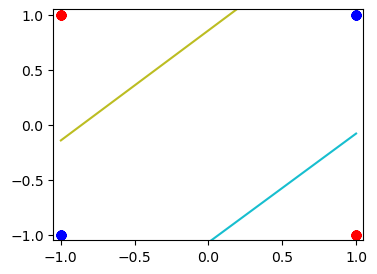

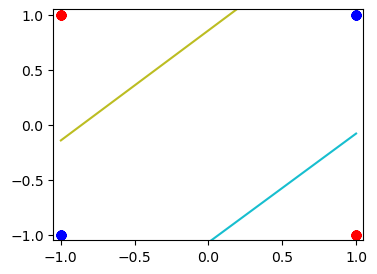

In [5]:
plt.clf()
ph=0   # sólo para dibujar

# Inicializamos los pesos
W1 = np.random.uniform(-1,1,[ocultas, entradas])
b1 = np.random.uniform(-1,1, [ocultas,1])

W2 = np.random.uniform(-1,1,[salidas, ocultas])
b2 = np.random.uniform(-1,1, [salidas,1])

epoca = 0

ECM_ant = 0
ECM = 1
errores = []

while ( abs(ECM - ECM_ant) > CotaError ) and ( epoca < MAX_EPOCAS ):
    
    ECM_ant = ECM
    
    sumaEC = 0
    for e in range(nEjemplos):  #para cada ejemplo

        xi = X[e:e+1, :]     # ejemplo a ingresar a la red

        # propagar el ejemplo hacia adelante
        
        # W1(ocultas,entrada), xi.T(entradas,1), b1(ocultas,1) 
        netasH = W1 @ xi.T + b1      #  -------> netasH (ocultas,1)     
        
        salidasH = evaluar(FunH, netasH) #  ---> salidasH (ocultas,1)
        
        # W2(salidas,ocultas), salidasH(ocultas,1), b2(salidas,1)
        netasO = W2 @ salidasH + b2
        salidasO = evaluar(FunO, netasO)   # -----> salidasO(salidas,1)

        # calcular los Deltas en ambas capas        
        ErrorSalida = T[e]-salidasO
        deltaO = ErrorSalida * evaluarDerivada(FunO,salidasO)  # deltaO(salidas,1)
        
        deltaH = evaluarDerivada(FunH,salidasH)*(W2.T @ deltaO)

        # corregir todos los pesos      
        W1 = W1 + alfa * deltaH @ xi 
        b1 = b1 + alfa * deltaH 
        W2 = W2 + alfa * deltaO @ salidasH.T 
        b2 = b2 + alfa * deltaO 

        sumaEC = sumaEC + np.sum(ErrorSalida**2)
    
    ECM = sumaEC / nEjemplos
    errores.append(ECM)
    
    epoca = epoca + 1
    
    # Graficar las rectas
    if (epoca % 10) ==0:
        ph = dibuPtos_y_2Rectas(X,T, W1, b1, ph)    

### Evolución del ECM

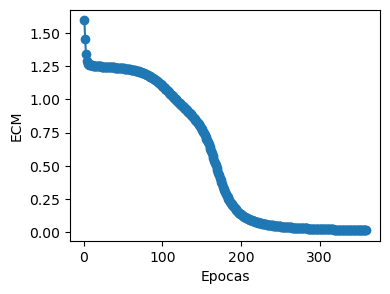

In [6]:
plt.clf()
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Epocas')
plt.ylabel('ECM')
plt.show()